# Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing packages for reading the dataset and processing
import numpy as np
import pandas as pd

In [3]:
# convert the given csv dataset to pandas dataframe.

df = pd.read_csv('./day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#1. Data understanding

In [4]:
#inspecting the number of rows and columns
df.shape

(730, 16)

In [5]:
#getting the summary of the dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#inspecting the Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the dataset

In [8]:
#Renaming ambiguous columns for better understanding
df.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Mapping variables season, month, weathersit, weekday, year

df['season']=df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
df['month']=df.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

df.head()

,instant,dteday,season,Year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#2. Data Visualisation

In [10]:
# Importing the data visualization libraaries

import matplotlib.pyplot as plt
import seaborn as sns

### Identify Continuous and Categorical Features

In [11]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

df.nunique().sort_values()

Year            2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
month          12
temp          498
humidity      594
casual        605
windspeed     649
registered    678
atemp         689
count         695
instant       730
dteday        730
dtype: int64

### Visualising Numeric Variables
Using pairplot to visualie numerical variables and finding the correlation with the target variable - 'count'.

In [12]:
# Numeric variables

num_vars = ["temp", "humidity",'casual','windspeed','registered','atemp','count','instant']

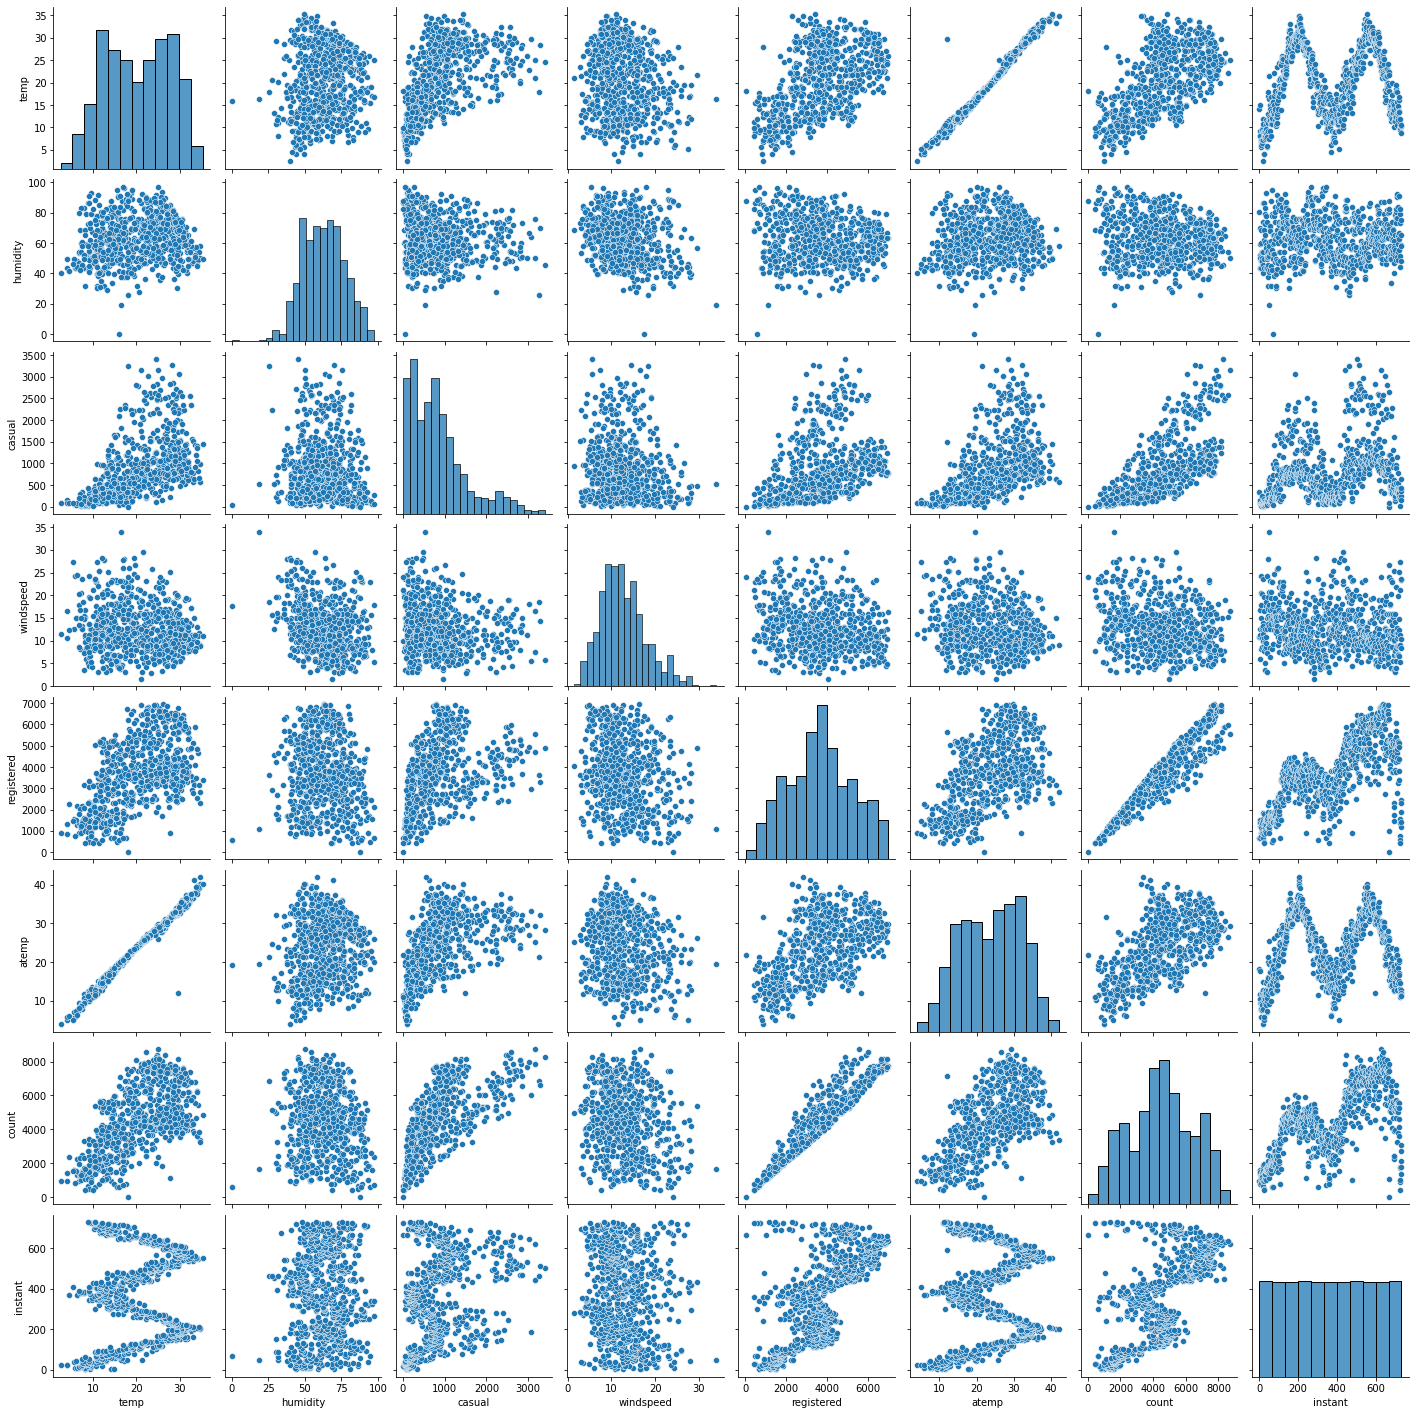

In [13]:
#Pairplot for numeric variables
sns.pairplot(df, vars=num_vars)
plt.show()

###Findings
- The target variable count is more correlated to temperature
- Windspeed and humidity do not show high correlation to the bike rentals count
- The casual and registered variables show high correlation to 'count' variable only because 'count' is the sum of those two variables.

### Visualising Categorical Variables

Boxplot can be used for visualizing categorical variables

In [14]:
# Categorical varibales

cat_vars = ['Year', 'holiday', 'workingday', 'month', 'weathersit', 'season', 'weekday']

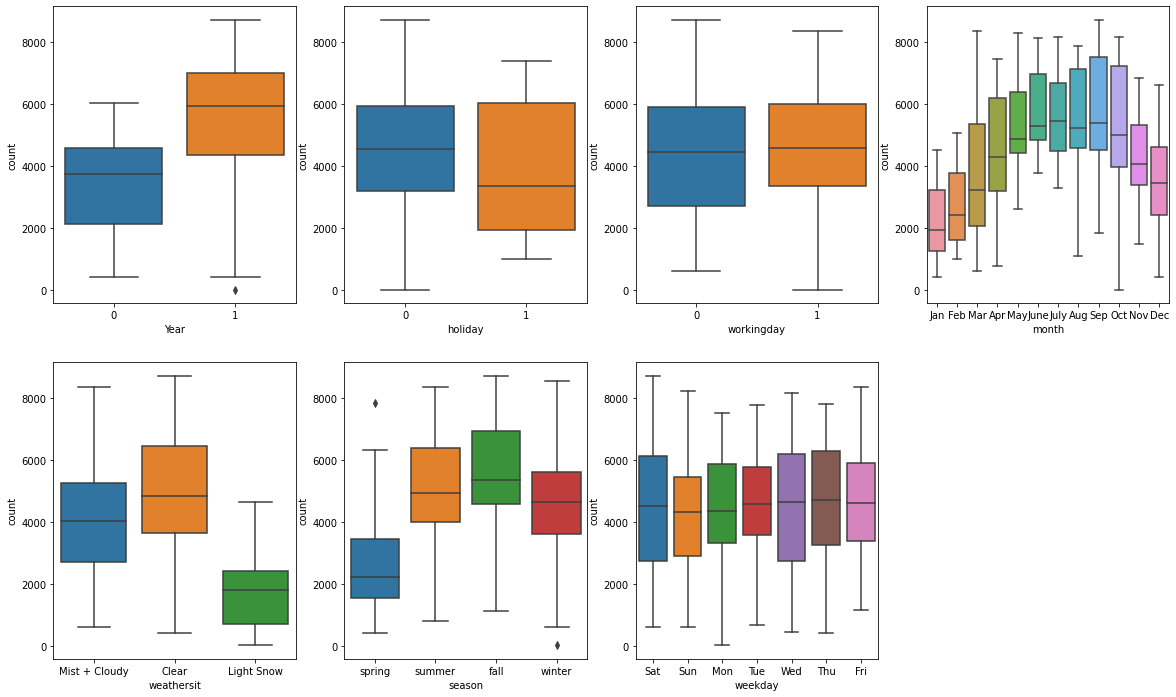

In [15]:
# Relationship between categorical features and target variable

plt.figure(figsize=(20, 12))

for i in range(len(cat_vars)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x = cat_vars[i], y = 'count', data = df)
plt.show()

The plots above shows the relationship between categorical variables and the target variable.  
- Bike Rental count are more in the Fall season and then in summer.
- Bike Rentals count are more in the year 2019 than 2018.
- Bike Rentals count are more in partly cloudy weather.
- Bike Rentals count are more on Saturday, wednesday and thursday.


## Analysing the varibales deeper

#### a. Season

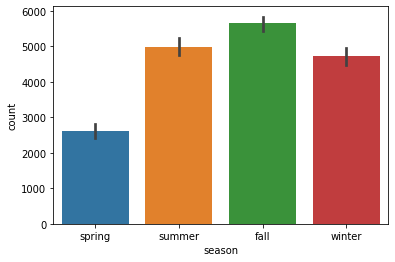

In [16]:
#Barplot to see relation between season and count of bike rentals

sns.barplot('season','count',data=df)
plt.show()

##### Bike Rentals are more during the Fall season and then in summer as inferred from the box plots.

#### b. Weathersit

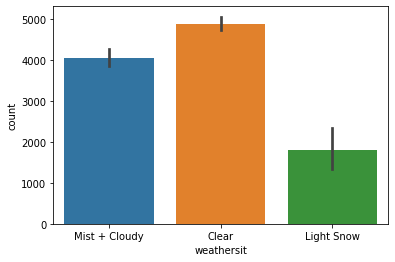

In [17]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',data=df)
plt.show()
           

##### Bike Rentals are more in partly cloudy weather as inferred from the box plots.

#### c. Year [0: 2018, 1:2019]

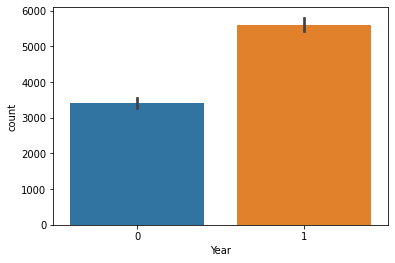

In [18]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=df)
plt.show()

##### Bike rentals are more in the year 2019 compared to 2018

#### d. Month

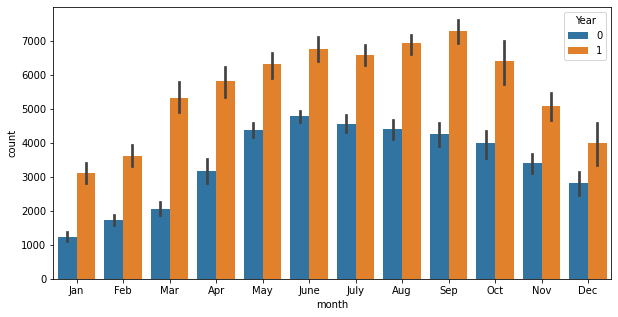

In [19]:
#Relation between month and  count
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=df)
plt.show()

##### Bike Rentals are more in the year 2019 compared to 2018 as inferred from the box plots

#### e. Temperature

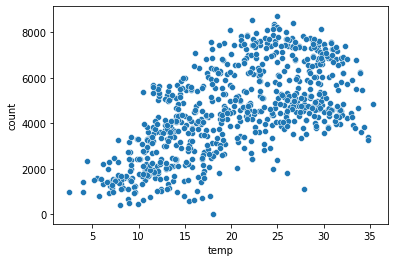

In [20]:
#scatter plot for temperature to count

sns.scatterplot(x='temp',y='count' ,data=df)
plt.show()

##### Bike Rentals are observed at higher temperatures

#### f. Humidity

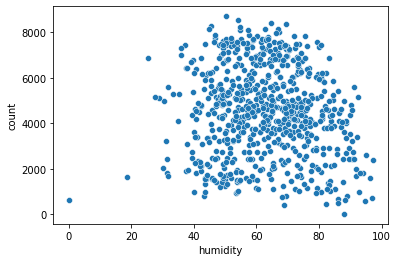

In [21]:
sns.scatterplot(x='humidity', y='count',data=df)
plt.show()

##### Bike rentals more at high humidity

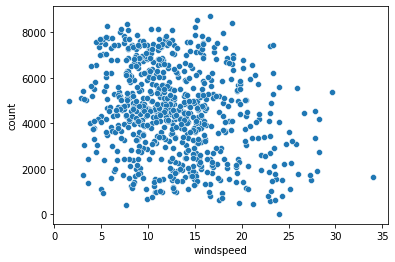

In [22]:
sns.scatterplot(x='windspeed', y='count',data=df)
plt.show()

### Heatmap 

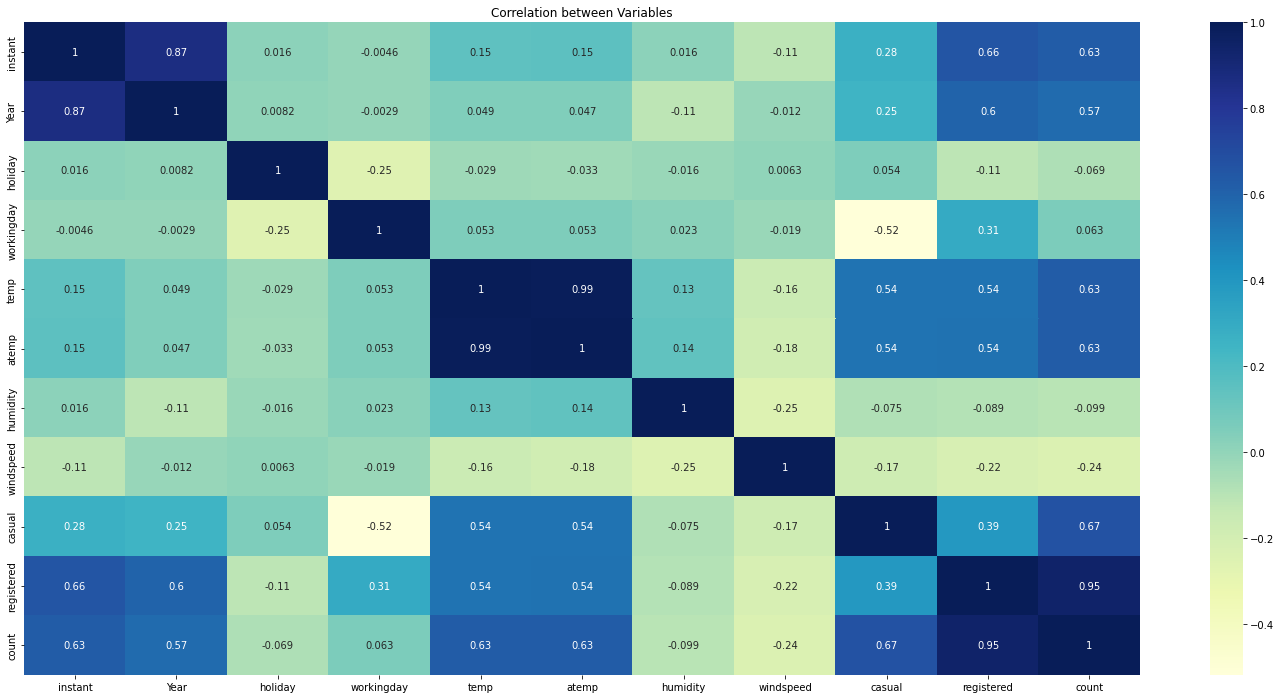

In [23]:
#Heatmap to see correlation between variables

plt.figure(figsize=(25, 12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

As we can see correlation between several variables in this heatmap it makes sense to build a linear regression model for predicting the demand.

We can see the dataset has some variables that are not required.
[instant, dteday, casual, registered]

In [24]:
# droping the unnecessary variables from the dataset

df=df.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
df.head()

,season,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### Check the datatypes

In [25]:
#Checking datatypes of all the columns

df.dtypes

season         object
Year            int64
month          object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
humidity      float64
windspeed     float64
count           int64
dtype: object

#3. Data Preparation

Creating dummy variables for the categorical features

In [26]:
# using 'drop_first = True'pd.get_dummies(df.season,drop_first=True)

months=pd.get_dummies(df.month,drop_first=True)
weekdays=pd.get_dummies(df.weekday,drop_first=True)
weather_sit=pd.get_dummies(df.weathersit,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)

df=pd.concat([months,weekdays,weather_sit,seasons,df],axis=1)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [27]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it

df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
df.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [28]:
#Number of rows and columns
df.shape

(730, 29)

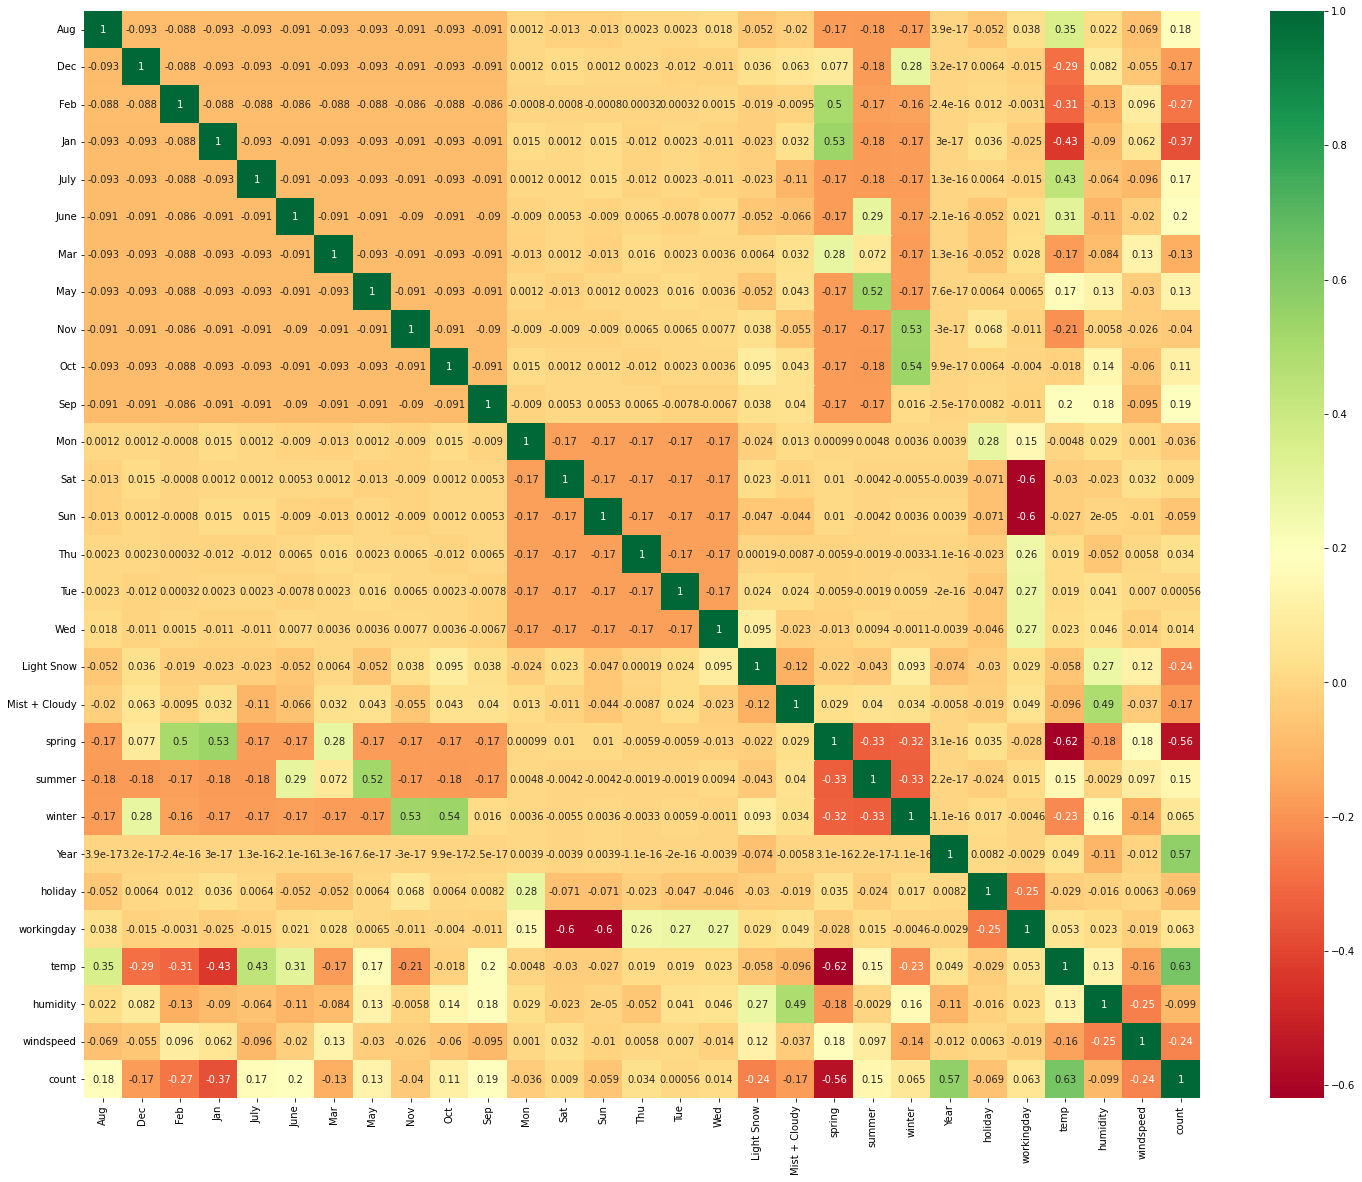

In [29]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), cmap='RdYlGn', annot = True) 
plt.show()

Temperature,Summer season,June to october months are in good correlation with the 'count' variable.

performing the test-train split and scale the features.

In [30]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [31]:
#Rows and columns after split
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### Rescaling the Features

It is important to have all the variables on the same scale for the model to be easily interpretable. 
We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale. 
- **There are two common ways of rescaling:**

- Min-Max scaling (Normalisation):Between 0 and 1
- Standardisation :mean-0, sigma-1


##### Min-Max scaling

In [32]:
#Normalisation = (x-xmin)/(x max-x min)
#Standardisation= (x-mu)/ sigma
#import the library
from sklearn.preprocessing import MinMaxScaler

In [33]:
#Instantiate an object
scaler = MinMaxScaler()

#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.380981,0.191095


In [34]:
#Checking numeric variables(min and max) after scaling
df_train.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,...,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,...,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**All the numeric variables are now mapped between 0 and 1**

Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors

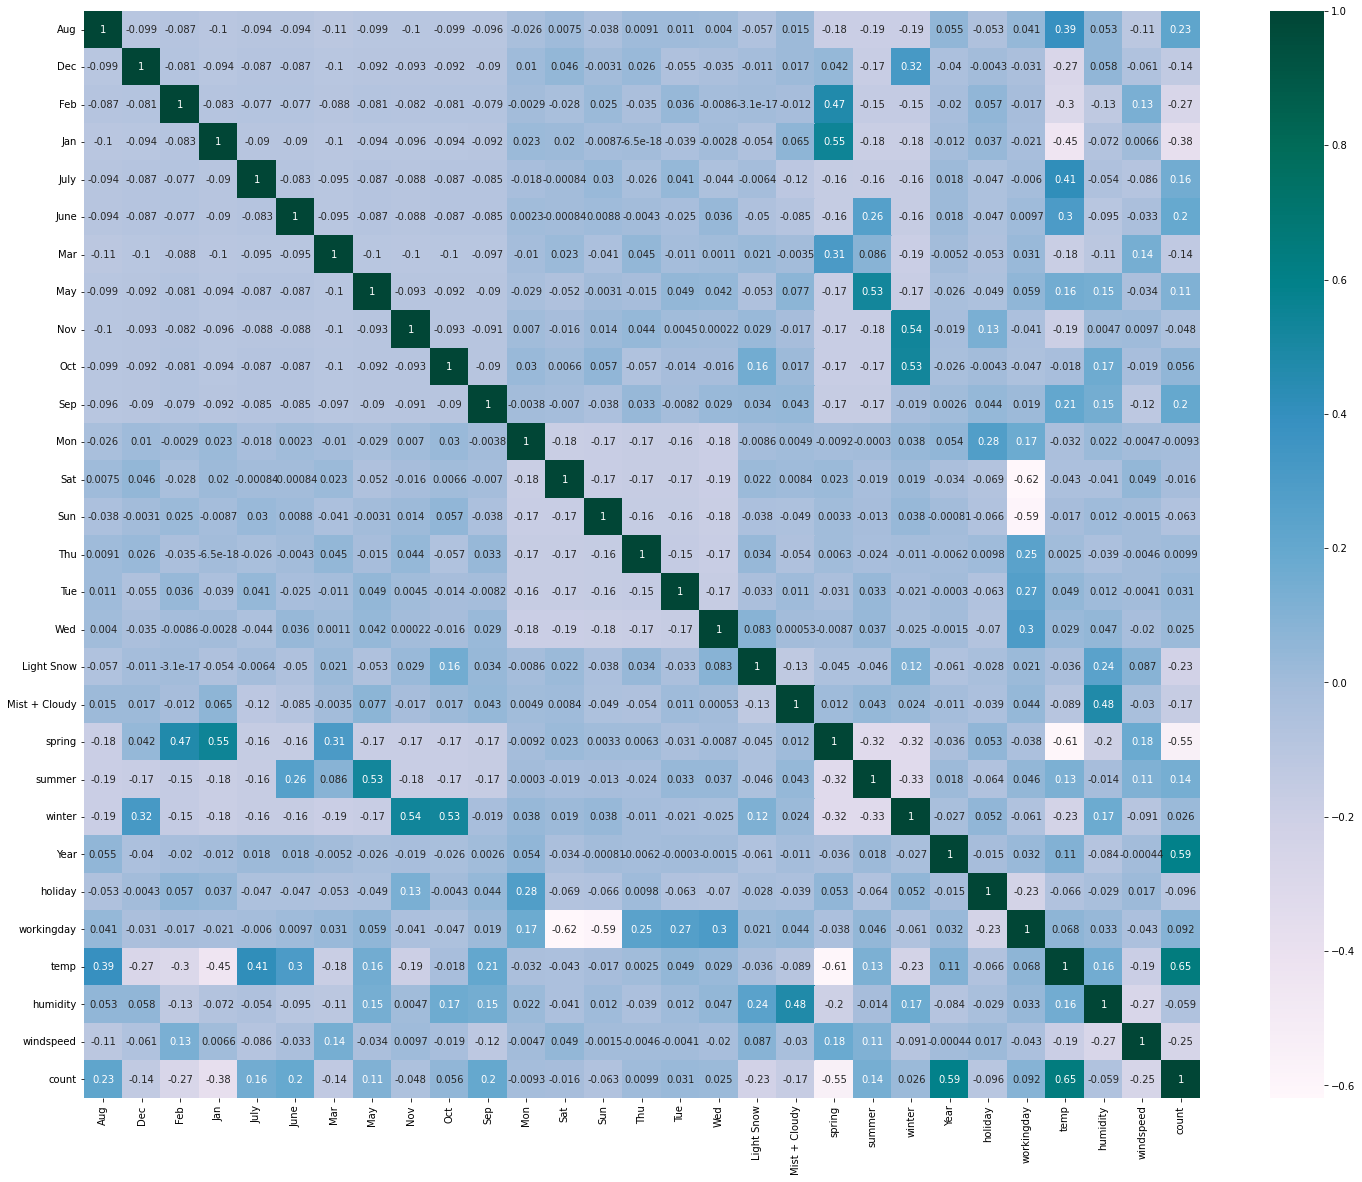

In [35]:
# Check the correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(25, 20))
sns.heatmap(df_train.corr(),cmap='PuBuGn',annot = True)
plt.show()

Temp and year are correlated to the 'count' variable.


#4. Model Building

In [36]:
#Divide the data into X and y

y_train = df_train.pop('count')
X_train = df_train

LinearRegression and RFE from sklearn

### RFE - **Recursive Feature Elimination**

In [37]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [38]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [39]:
#List of variables selected

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Aug', False, 9),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 11),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 12),
 ('Tue', False, 8),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [40]:
#Columns where RFE support is True

col = X_train.columns[rfe.support_]
col

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [41]:
#Columns where RFE support is False

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [43]:
X_train_rfe.columns

Index(['July', 'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)


In [45]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.11e-191
Time:                        14:19:40   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200

###VIF - Variance Inflation Factor

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test linear models. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [47]:
#Drop the constant term B0

X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,50.68
2,Sat,12.20
3,Sun,11.79
6,spring,5.02
12,temp,3.62
8,winter,3.49
10,holiday,2.91
7,summer,2.62
13,humidity,1.91
5,Mist + Cloudy,1.57


**'workingday' variable can be dropped as its insignificant by looking at very high VIF**

Rebuilding the model without 'workingday'

In [49]:
#Drop workingday
X_train_new1 = X_train_rfe.drop(["workingday"], axis = 1)

In [50]:
#Build a model
X_train_lm1 = sm.add_constant(X_train_new1)
lm1 = sm.OLS(y_train,X_train_lm1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.11e-191
Time:                        14:19:40   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2832      0.034      8.300

In [51]:
#Drop the constant term B0
X_train_lm1 = X_train_lm1.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,humidity,28.25
11,temp,16.06
13,windspeed,4.68
6,spring,4.03
8,winter,3.36
7,summer,2.79
5,Mist + Cloudy,2.30
9,Year,2.08
0,July,1.59
1,Sep,1.39


**'humidity' variable can be dropped as its insignificant by looking at very high VIF**

##### Rebuilding the model without 'humidity'

In [53]:
#Drop humidity
X_train_new2 = X_train_lm1.drop(["humidity"], axis = 1)

In [54]:
#Build a model
X_train_lm2 = sm.add_constant(X_train_new2)
lm2 = sm.OLS(y_train,X_train_lm2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.28e-188
Time:                        14:19:40   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2037      0.029      6.972

In [55]:
#Drop the constant
X_train_lm2=X_train_lm2.drop(['const'],axis=1)

In [56]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.18
12,windspeed,4.63
7,summer,2.24
6,spring,2.13
9,Year,2.07
8,winter,1.84
0,July,1.59
5,Mist + Cloudy,1.56
1,Sep,1.34
2,Sat,1.23


**'sat' variable can be dropped as its insignificant by looking at high p-value**

Rebuilding the model without 'sat'

In [57]:
#Drop sat
X_train_new3 = X_train_lm2.drop(["Sat"], axis = 1)

In [58]:
#Build a model
X_train_lm3 = sm.add_constant(X_train_new3)
lm3 = sm.OLS(y_train,X_train_lm3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.45e-189
Time:                        14:19:41   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.074

In [59]:
#Drop the constant
X_train_lm3=X_train_lm3.drop(['const'],axis=1)

In [60]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.14
11,windspeed,4.60
6,summer,2.24
5,spring,2.11
8,Year,2.07
7,winter,1.81
0,July,1.59
4,Mist + Cloudy,1.56
1,Sep,1.34
2,Sun,1.18


**'temp' variable cannot be droppedeven though it has high VIF value. Because 'temp' variable has 0 p-value and also we have seen it's correlation with target variable during EDA.**

**Let us see the results by dropping 'windspeed'. It has high VIF value.**

Building new model without 'windspeed' variable

In [61]:
#Drop windspeed
X_train_new4 = X_train_lm3.drop(["windspeed"], axis = 1)

In [62]:
#Build a model
X_train_lm4 = sm.add_constant(X_train_new4)
lm4 = sm.OLS(y_train,X_train_lm4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.83e-183
Time:                        14:19:41   Log-Likelihood:                 489.93
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     498   BIC:                            -905.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1567      0.029      5.424

###Here as we can see the Adjusted R-squared value has decreased when we dropped 'windspeed' variable. So let us keep it.

##### The p values represent the significance of the variables and VIF which represent how variables are correlated to each other. Based on these two parameters we decided which variable to drop.



**- The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.**

**-  The common practise is if a VIF is > 10, you have high multicollinearity. In our case, with values less than 5 (except temp), we are good, and can proceed with our regression**

**- R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. And we have the R-square value of 0.837 or 83.7%**

**- The adjusted R-squared adjusts for the number of terms in the model. And we got it around 0.84 or 84%**

Lets check one more model by dropping temp keeping windspeed

In [63]:
#Drop temp for the lm4 model 
X_train_new5=X_train_lm3.drop(['temp'], axis=1)


In [64]:
#Building a model
X_train_lm5= sm.add_constant(X_train_new5)
lm5=sm.OLS(y_train,X_train_lm5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.55e-150
Time:                        14:19:41   Log-Likelihood:                 412.38
No. Observations:                 510   AIC:                            -800.8
Df Residuals:                     498   BIC:                            -749.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5901      0.017     35.272

**Here we can see there is a drop on R-square and adjusted R-squared from model 3. So this wont be a good model.**
### So our model is lm3 which is obtained by removing 'working daya', 'sat', 'humidity' variables from the RFE support columns**

#5. Residual Analysis of the train data

Inspecting error terms to see if the assumptions made for the linear models are correct.
The error term distribution should be normal with a mean value close to zero.

In [65]:
X_train_lm3=sm.add_constant(X_train_lm3)
X_train_lm3.columns

Index(['const', 'July', 'Sep', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'Year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [66]:
X_train_lm3.head()

,const,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,windspeed
576,1.0,1,0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,0,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,1,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,0,0,1,0,1,0,1,0,0.395666,0.188475
111,1.0,0,0,0,0,1,0,1,0,0,0,0.345824,0.380981


In [67]:
#y train predicted
y_train_pred = lm3.predict(X_train_lm3)

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 432x288 with 0 Axes>

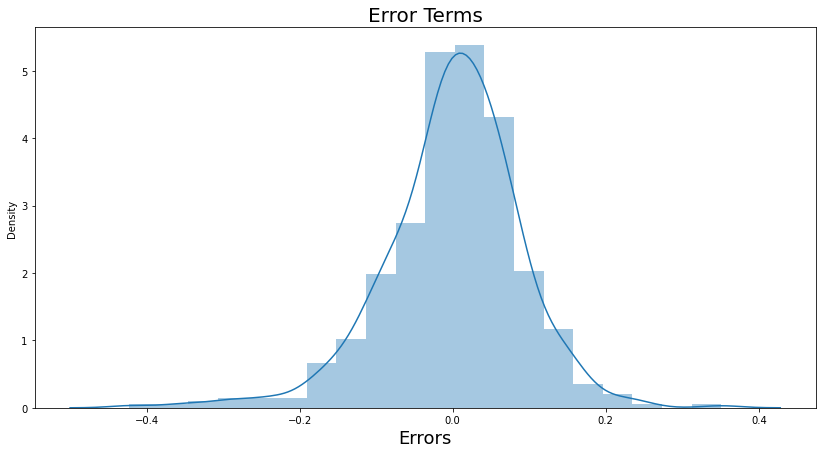

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

**We can see Error terms are normally distributed**

#6. Predictions

#### Applying the scaling on the test sets

In [70]:
#Create a list of numeric variables
num_vars=['temp','humidity','windspeed','count']

#Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.334206,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test


In [71]:
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


In [72]:
#Dividing into X_test and y_test
y_test = df_test.pop('count')
X_test = df_test
X_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,Mist + Cloudy,spring,summer,winter,Year,holiday,workingday,temp,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [73]:
#Columns
X_train_new3.columns

Index(['July', 'Sep', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter', 'Year', 'holiday', 'temp', 'windspeed'],
      dtype='object')

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new3.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter,Year,holiday,temp,windspeed
184,1.0,1,0,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [75]:
X_test_new1.shape

(220, 13)

In [76]:
X_test_new1.shape

(220, 13)

In [77]:
# Making predictions
y_pred = lm3.predict(X_test_new1)


In [78]:
y_pred.shape

(220,)

### Finding R-squared and Adjusted R-Squared for Test set

In [79]:
#Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8079646332676633

In [80]:
#Adjusted R^2
#adj r2=1-(1-R2)*(n-1)/(n-p-1)

#n =sample size , p = number of independent variables

Adj_r2=1-(   ((1-0.8079646)*(220-1))/(220-12-1)   )
print(Adj_r2)

0.7968321130434783


#6. Model Evaluation

Text(0, 0.5, 'y_pred')

<Figure size 432x288 with 0 Axes>

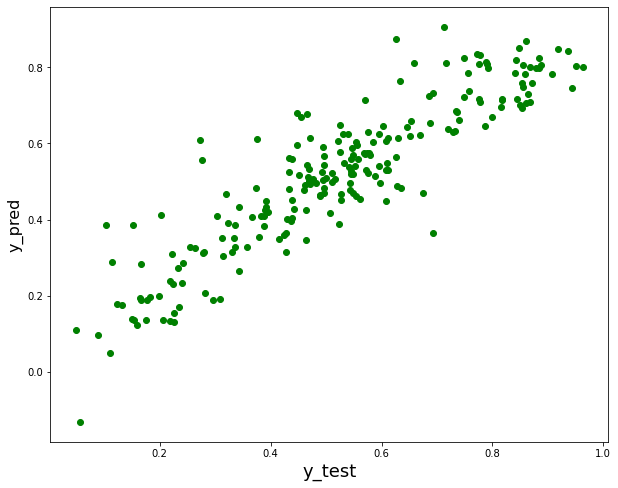

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred,color='green')
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

##### Visualising the fit on the test set

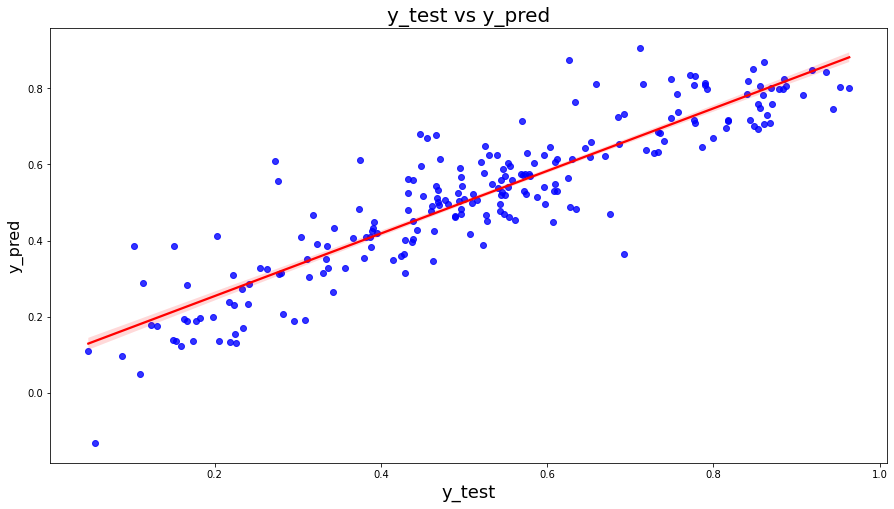

In [82]:
#Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Getting the models parameters

In [83]:
lm3.params

const            0.206034
July            -0.049235
Sep              0.076013
Sun             -0.048345
Light Snow      -0.289492
Mist + Cloudy   -0.082198
spring          -0.065521
summer           0.047536
winter           0.084806
Year             0.233472
holiday         -0.105201
temp             0.490684
windspeed       -0.147854
dtype: float64


We can see that the equation of our best fitted line is:

count = 0.206 + 0.49*temp + 0.233*year - 0.147+windspeed - 0.105*holiday + 0.084*winter  + 0.0475*summer - 0.0655*spring -0.082*(Mist + Cloudy) - 0.289(*Light Snow) - 0.048*Sunday + 0.076*September - 0.049*July            
           


# Final Result Comparison between Train model and Test: 

### - Train R^2 :  0.841

### - Train Adjusted R^2 : 0.837

### - Test R^2: 0.808

### - Test Adjusted R^2: 0.797



# **Final model is the LinearRegression model named 'lm3'**